In [1]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import linalg
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import random
import pylab
from scipy import stats
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import inverse_method_funs_med as inv

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Load data
Load cross sectional backscatter matrix that contains the mean values for each species

In [3]:
# Sigmabs from ZooScatR model runs + viscous elactic model for mean of fish larvae model by ve=True)
fname_sim = '../ZooScatStuff/my_simplified_data_11072022.feather'
specs, freqs_sim, sig_bs_mean, ci_boot = inv.read_scatteringmodelsimulations(fname_sim, nsim=1000, ve=True, percentiles=(25,75))

In [4]:
np.shape(ci_boot)

(2, 1001, 5)

# Select frequency range
The vectors have to be independant over the range of the emitted frequenciesm

In [5]:
BBrange_200 = [185, 255]
BBrange_333 = [283, 383]

BBfreqs_200 = np.where((freqs_sim>BBrange_200[0]) & (freqs_sim<BBrange_200[1]))
BBfreqs_333 = np.where((freqs_sim>BBrange_333[0]) & (freqs_sim<BBrange_333[1]))

In [6]:
np.shape(sig_bs_mean)

(1001, 5)

In [7]:
sigbs_200 = sig_bs_mean[BBfreqs_200,:][0]
sigbs_333 = sig_bs_mean[BBfreqs_333,:][0]

freqs_200 = freqs_sim[BBfreqs_200]
freqs_333 = freqs_sim[BBfreqs_333]

In [8]:
np.shape(freqs_sim)

(1001,)

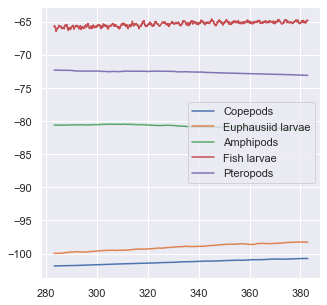

In [9]:
fig=plt.figure(figsize=(5,5))
plt.plot(freqs_333, 10*np.log10(sigbs_333));
plt.legend(specs)

# Rank

The rank tells us if the columns of the vector are linearly independant. Linear independance is important for knowing if each species introduces a new dimensions for the solution. If two species (vectors) are dependant they would be indisquindishable in the least-squares solutions

In [10]:
np.linalg.matrix_rank(sigbs_333)

5

5 dimensions with default tolerance

What should the tol be? Default? Look into what is my CI ish 

    "The most useful measure of the tolerance depends on the operations you intend to use on your matrix. For example, if your data come from uncertain measurements with uncertainties greater than floating point epsilon, choosing a tolerance near that uncertainty may be preferable. The tolerance may be absolute if the uncertainties are absolute rather than relative." -  from np.linalg.matrix_rank documentations"
    


In [11]:
help(np.linalg.matrix_rank)

Help on function matrix_rank in module numpy.linalg:

matrix_rank(M, tol=None, hermitian=False)
    Return matrix rank of array using SVD method
    
    Rank of the array is the number of singular values of the array that are
    greater than `tol`.
    
    .. versionchanged:: 1.14
       Can now operate on stacks of matrices
    
    Parameters
    ----------
    M : {(M,), (..., M, N)} array_like
        Input vector or stack of matrices.
    tol : (...) array_like, float, optional
        Threshold below which SVD values are considered zero. If `tol` is
        None, and ``S`` is an array with singular values for `M`, and
        ``eps`` is the epsilon value for datatype of ``S``, then `tol` is
        set to ``S.max() * max(M.shape) * eps``.
    
        .. versionchanged:: 1.14
           Broadcasted against the stack of matrices
    hermitian : bool, optional
        If True, `M` is assumed to be Hermitian (symmetric if real-valued),
        enabling a more efficient method for